# Pyproj

Proj is a cartographic transformation class, allowing for 

- conversion from geogrphic coordinates (lon, lat) to cartographic coordinates (x,y) known as Forward projection
- conversion from cartographic coordinates to geographic coordinates, known as inverse projection
- calculation of great circle distances


In [1]:
import pyproj #assume conda install pyproj

http://www.latlong.net/place/orpheum-theater-phoenix-az-usa-5120.html

# Turn back on to render locally. Off for github rendering
from IPython.core.display import display, HTML
display(HTML('http://www.latlong.net/place/orpheum-theater-phoenix-az-usa-5120.html'))

In [2]:
# Phoenix Orpheum Theatre from lon lat to UTM
p = pyproj.Proj(proj='utm', zone=12, ellpse='WGS84')
x,y = p(-112.077019, 33.449184)

In [3]:
x,y

(399899.94177803374, 3701603.9358617216)

In [4]:
# now in reverse
'lon=%8.3f lat=%5.3f' % p(x, y, inverse=True)

'lon=-112.077 lat=33.449'

In [5]:
# three cities at a time
# (Fresno, LA, SF)
lons = (-119.72,-118.40,-122.38)
lats = (36.77, 33.93, 37.62 )
x, y = p(lons, lats)
x, y

((-279054.5432529022, -184654.38644226943, -505938.564040289),
 (4105003.9203669475, 3779156.0097933286, 4225094.613459164))

In [6]:
# reverse
p(x, y, inverse=True)

((-119.72000000000001, -118.40000000000002, -122.38),
 (36.77000000000001, 33.92999999999999, 37.62))

## Geod

Handles various great circle  calculations

In [7]:
g = pyproj.Geod(ellps='WGS84')

In [8]:
KEWK = (40.6895, -74.1745)
KPHX = (33.4373, -112.0078)
KORD = (41.9742, -87.9073)

elat, elon = KEWK
plat, plon = KPHX
olat, olon = KORD


In [9]:
gcd = g.inv(elon, elat, plon, plat)

In [10]:
gcd

(-91.2732290860914, 65.3386673857264, 3431568.1185160098)

In [11]:
gcd[-1]*0.000621371 # miles

2132.2769133704114

In [12]:
gcd = g.inv(plon, plat, elon, elat)

In [13]:
gcd

(65.3386673857264, -91.2732290860914, 3431568.1185160098)

## Intermediate Points on GCR

In [14]:
ll10 = g.npts(elon, elat, plon, plat, 10)

ll10

[(-77.85858092028559, 40.5682366828179),
 (-81.52301714815934, 40.33004945596237),
 (-85.15562152245272, 39.976714526142466),
 (-88.74513566069402, 39.51080730766174),
 (-92.28150793734804, 38.93561891656732),
 (-95.75609646052925, 38.25505542350523),
 (-99.16179186625742, 37.473526814876784),
 (-102.49306249399991, 36.59583251735883),
 (-105.74593070568727, 35.62704959089719),
 (-108.91789319309771, 34.57242850333217)]

In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [16]:
import numpy as np
ll10 = np.array(ll10)

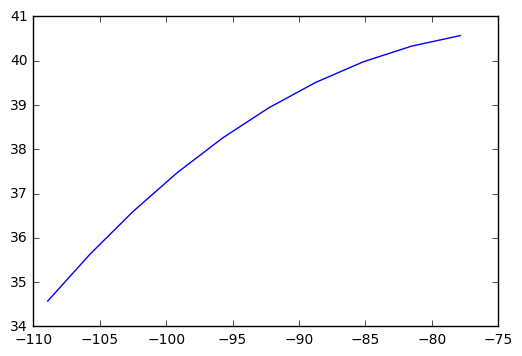

In [17]:
plot(ll10[:,0], ll10[:,1])

(32, 45)

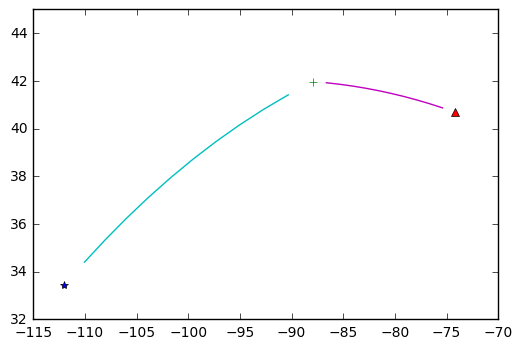

In [18]:
# phx to ord to ewk
plot(plon, plat, "*")
plot(olon, olat, "+")
plot(elon, elat, '^')
ll10 = np.array(g.npts(plon, plat, olon, olat, 10))
plot(ll10[:,0], ll10[:,1])
ll10 = np.array(g.npts(olon, olat, elon, elat, 10))
plot(ll10[:,0], ll10[:,1])
ylim(32, 45)



(32, 45)

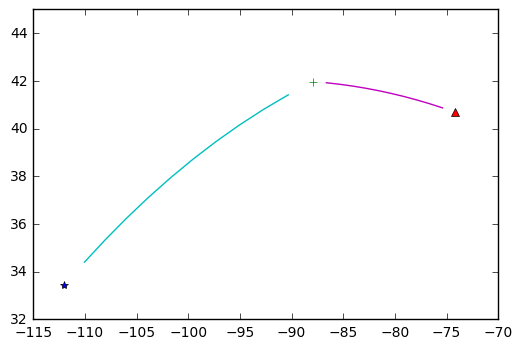

In [19]:
# phx to ord to ewk
plot(plon, plat, "*")
plot(olon, olat, "+")
plot(elon, elat, '^')
ll10 = np.array(g.npts(plon, plat, olon, olat, 10))
plot(ll10[:,0], ll10[:,1])
ll10 = np.array(g.npts(olon, olat, elon, elat, 10))
plot(ll10[:,0], ll10[:,1])
ylim(32, 45)



(32, 45)

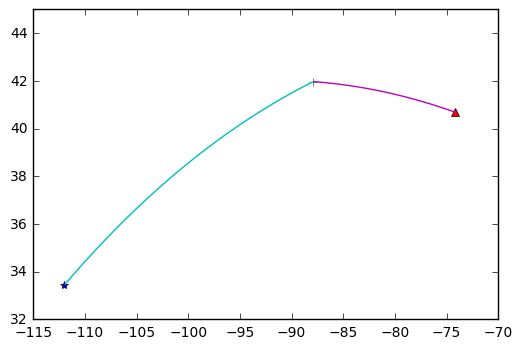

In [20]:
# phx to ord to ewk
plot(plon, plat, "*")
plot(olon, olat, "+")
plot(elon, elat, '^')
ll10 = np.array(g.npts(plon, plat, olon, olat, 200))
plot(ll10[:,0], ll10[:,1])
ll10 = np.array(g.npts(olon, olat, elon, elat, 200))
plot(ll10[:,0], ll10[:,1])
ylim(32, 45)



In [21]:
# miami
mlon = -80.1818
mlat = 25.7617

me = np.array(g.npts(mlon, mlat, elon, elat, 200))
mp = np.array(g.npts(mlon, mlat, plon, plat, 200))

(22, 45)

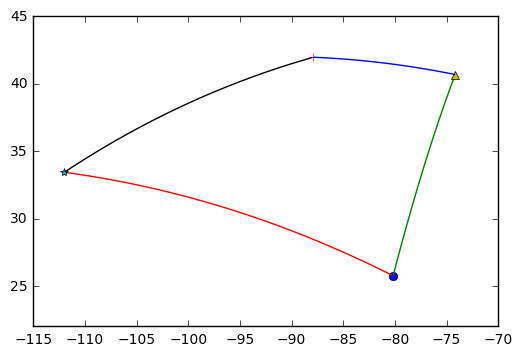

In [30]:
plot(mlon, mlat, "o")
plot(me[:,0], me[:,1])
plot(mp[:,0], mp[:,1])
plot(plon, plat, "*")
plot(olon, olat, "+")
plot(elon, elat, '^')
ll10 = np.array(g.npts(plon, plat, olon, olat, 200))
plot(ll10[:,0], ll10[:,1])
ll10 = np.array(g.npts(olon, olat, elon, elat, 200))
plot(ll10[:,0], ll10[:,1])
ylim(22, 45)